In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np
from sklearn.linear_model import LinearRegression
from calendar import monthrange

In [2]:
path = "AAPL_5YEAR.csv"

In [3]:
stock_df = pd.read_csv(filepath_or_buffer=path, header=0, sep=',', index_col=None, parse_dates=True, encoding=None, 
                    tupleize_cols=None, infer_datetime_format=False)

In [4]:
def convert(dataframe):
    return datetime.strptime(dataframe['Date'],"%Y-%m-%d")

In [5]:
stock_df['Date'] = stock_df.apply(func = convert, axis = 1)

In [6]:
first_day = stock_df.Date[0]
print(first_day)

2013-03-04 00:00:00


In [7]:
def time_conversion(dataframe):
    return (dataframe.Date - first_day).days+1

In [8]:
stock_df['days']= stock_df.apply(func = time_conversion, axis=1)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X=stock_df['days'].values[:, np.newaxis], y=stock_df['Open'].values[:, np.newaxis])
stock_df['open_pred'] = lin_reg.predict(stock_df['days'].values[:, np.newaxis])

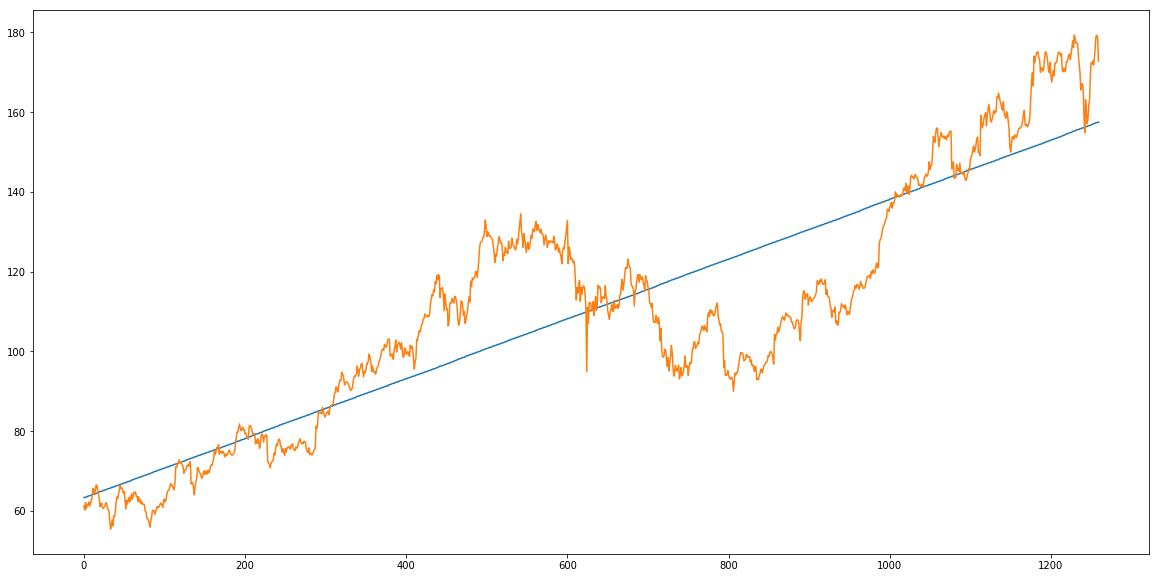

In [10]:
fig, ax = plt.subplots(1, 1)
stock_df.loc[:,'open_pred'].plot(ax=ax,figsize =(20,10))
stock_df.loc[:,'Open'].plot(ax=ax,figsize =(20,10))

In [11]:
stock_df['lin_diff'] = stock_df["Open"]-stock_df["open_pred"]

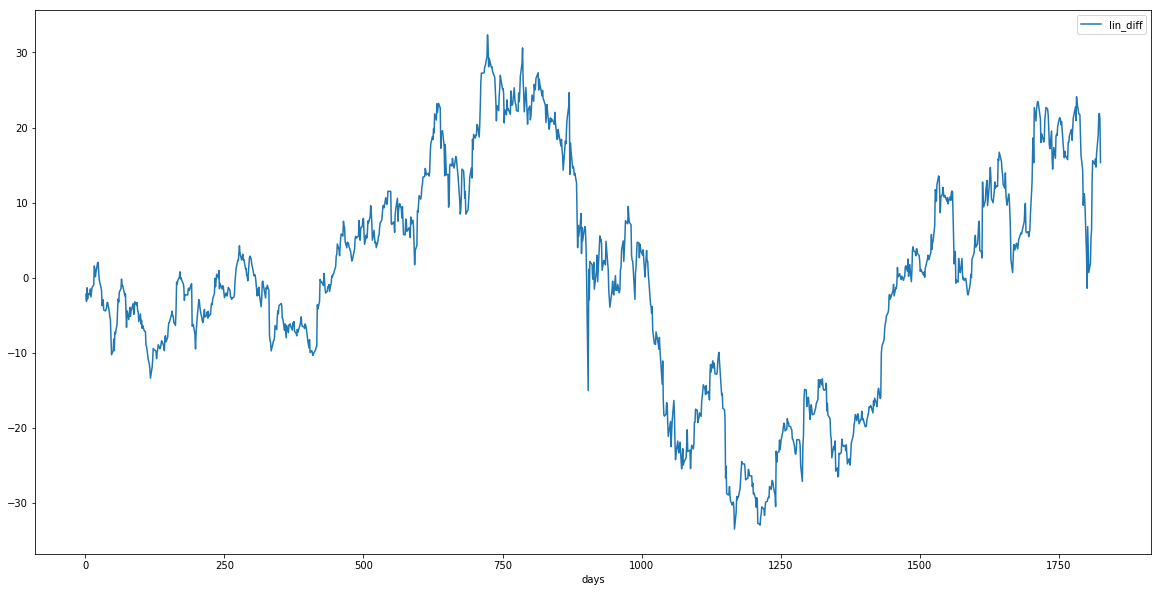

In [12]:
stock_df.plot(x = 'days', y = 'lin_diff', figsize = (20,10))

In [13]:
stock_df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,days,open_pred,lin_diff
0,2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900,1,63.326615,-2.212330
1,2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400,2,63.378239,-3.166809
2,2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500,3,63.429864,-1.357007


In [14]:
per_df = stock_df.iloc[:,-1].quantile(np.linspace(0, 1, 100, 0))
percentile = per_df.to_dict()

In [15]:
def to_percentile(dataframe, percentile):
    for percent_val in percentile:
        if dataframe['lin_diff'] < percentile[percent_val]:
            value = percent_val
            break
    return percent_val

In [16]:
stock_df['percentile'] = stock_df.apply(args = (percentile,), func = to_percentile, axis = 1)

In [17]:
stock_df['index'] = stock_df.days.copy('index')

In [18]:
stock_df.set_index('index')

,Date,Open,High,Low,Close,Adj Close,Volume,days,open_pred,lin_diff,percentile
index,,,,,,,,,,,
1,2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900,1,63.326615,-2.212330,0.41
2,2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400,2,63.378239,-3.166809,0.38
3,2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500,3,63.429864,-1.357007,0.44
4,2013-03-07,60.642857,61.715714,60.151428,61.511429,46.210499,117118400,4,63.481488,-2.838631,0.39
5,2013-03-08,61.400002,62.204285,61.230000,61.674286,46.332844,97870500,5,63.533113,-2.133111,0.41
8,2013-03-11,61.392857,62.715714,60.734287,62.552856,46.992863,118559000,8,63.687986,-2.295129,0.40
9,2013-03-12,62.228573,62.697144,61.081429,61.204285,45.979744,116477900,9,63.739611,-1.511038,0.43
10,2013-03-13,61.207142,62.071430,60.765713,61.192856,45.971165,101387300,10,63.791235,-2.584093,0.39
11,2013-03-14,61.832859,62.091427,61.492859,61.785713,46.416553,75968900,11,63.842860,-2.010001,0.42


In [19]:
stock_df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume,days,open_pred,lin_diff,percentile,index
799,2016-05-04,95.199997,95.900002,93.820000,94.190002,90.803566,41025500,1158,123.056151,-27.856154,0.04,1158
1034,2017-04-10,143.600006,143.880005,142.899994,143.169998,140.940399,18933400,1499,140.660103,2.939903,0.59,1499
643,2015-09-21,113.669998,115.370003,113.660004,115.209999,109.997543,50222000,932,111.389016,2.280982,0.56,932
394,2014-09-24,102.160004,102.849998,101.199997,101.750000,95.513741,60171800,570,92.700950,9.459054,0.74,570
382,2014-09-08,99.300003,99.309998,98.050003,98.360001,92.331505,46356700,554,91.874959,7.425044,0.71,554


In [20]:
def chunk_std(dataframe, column):
    dataframe[column+'_delta'] = abs(dataframe[column].diff().shift(-1))
    cols = ['span','min_per','max_per','start','end',    'min_open','max_open']
    std  = dataframe[column+'_delta'].std()
    new_df = pd.DataFrame()
    new_chunk = pd.DataFrame()
    index_count = 0
    min_per, max_per, span = dataframe.iloc[0][column],   dataframe.iloc[0][column],0
    min_heart, max_heart   = dataframe.iloc[0].open_pred, dataframe.iloc[0].open_pred   ### HARDCODED
    start_min, end_min     = dataframe.iloc[0].days,      dataframe.iloc[0].days        ### HARDCODED
    print(std)
    
    for curr in dataframe.index:
        span+=1
        if dataframe.loc[curr][column+'_delta'] > std :
            #TODO: ADD TOGGLE TO SWITCH TO ACCELERATED GROWTH AND NO GROWTH
            start_min = end_min 
            end_min = dataframe.loc[curr].days
            start_chunk = curr
            
            if (span > 5):
                new_chunk = pd.DataFrame(data = [[span, min_per, max_per, start_min, end_min, min_heart, max_heart]], index =[index_count], columns=list(cols))
                new_df = new_df.append(new_chunk)
                index_count+=1
                
                min_per, max_per      = dataframe.loc[curr][column], dataframe.loc[curr][column]
                min_heart, max_heart  = dataframe.loc[curr]['Open'],   dataframe.loc[curr]['Open'] ###HARDCODED
            
            span = 0
            #print("Higher Creating new chunk",new_df)
        else:
            if (min_per > dataframe.loc[curr][column]):
                min_per = dataframe.loc[curr][column]
            if (max_per < dataframe.loc[curr][column]):
                max_per = dataframe.loc[curr][column]
            if (min_heart > dataframe.loc[curr]['Open']):           ###HARDCODED
                min_heart = dataframe.loc[curr]['Open']             ###HARDCODED
            if (max_heart < dataframe.loc[curr]['Open']):           ###HARDCODED
                max_heart = dataframe.loc[curr]['Open']             ###HARDCODED
    return new_df

In [21]:
chunk_stock = chunk_std(stock_df, 'percentile')

0.030049819035374653


In [22]:
chunk_stock.head(3).append([chunk_stock.sample(5),chunk_stock.tail(3)])

,span,min_per,max_per,start,end,min_open,max_open
0,12,0.33,0.55,29,45,60.224285,66.491432
1,60,0.21,0.45,74,162,55.424286,66.860001
2,10,0.30,0.52,163,177,65.265717,72.815712
46,15,0.60,0.81,1537,1559,145.100006,156.009995
48,8,0.75,0.83,1628,1640,157.500000,161.940002
56,6,0.52,0.97,1810,1821,157.070007,179.369995
40,7,0.11,0.21,1332,1341,111.400002,117.949997
1,60,0.21,0.45,74,162,55.424286,66.860001
54,9,0.82,0.96,1744,1755,167.500000,175.110001
55,14,0.84,0.92,1755,1780,170.100006,176.179993


In [23]:
def more_chunky(orig_df, chunk_df):
    cols = ['span','start','end','start_date', 'end_date',     'min_heart', 'max_heart', 'chunk_std']
    std = orig_df['percentile'].std()## CHANGED TO PERCENTILE INSTEAD OF PERCENTILE_DELTA
    print(std)
    chunk_list = chunk_df.sort_values(by='span',ascending=False).index.tolist()
    new_df = pd.DataFrame()
    start, end, min_heart, max_heart, chunk_std = 0,0,0,0,0
    skip_list = []
    new_chunk = pd.DataFrame()
    new_df    = pd.DataFrame()
    index_count = 0
    for num in range(len(chunk_list)):
        if num in skip_list:
            continue
        new_std = -1
        count = 1
        #print(str(chunk_list[num]))
        if (len(chunk_df) > (chunk_list[num]+1)):
            start = orig_df[orig_df['days'] == chunk_df.loc[chunk_list[num]].start].index.values[0]
            end   = orig_df[orig_df['days'] == chunk_df.loc[chunk_list[num]+count].end].index.values[0]
        else:
            continue
        while(new_std < std):
            if (len(chunk_df) > (chunk_list[num]+count)):
                new_end   = orig_df[orig_df['days'] == chunk_df.loc[chunk_list[num]+count].end].index.values[0]
                new_std = 5 * orig_df.loc[start:orig_df[orig_df['days'] == chunk_df.loc[chunk_list[num]+count].end].index.values[0]].append(pd.DataFrame(data = [[-2*std]*13],
                                                       columns=orig_df.columns)).percentile_delta.std()
                if new_std < std:
                    chunk_std = new_std
                    end = new_end
                count+=1
            else:
                break
        min_heart = orig_df.loc[start:end]['Open'].min()
        max_heart = orig_df.loc[start:end]['Open'].max()
        new_chunk = pd.DataFrame(data = [[(end-start), start, end, orig_df.loc[start].Date, orig_df.loc[end].Date,
                                            min_heart, max_heart, chunk_std]],index =[index_count], columns=list(cols))
        #print("St:",start,end)
        index_count+=1
        new_df = new_df.append(new_chunk)
    return new_df

In [24]:
super_chunky = more_chunky(stock_df,chunk_stock)
super_chunky = super_chunky.sort_values(by='start_date')

0.2888201280932828


In [25]:
super_chunky.sort_values(by='span', ascending = False)

,span,start,end,start_date,end_date,min_heart,max_heart,chunk_std
3,509,746,1255,2016-02-18,2018-02-26,90.000000,179.369995,0.193097
34,115,601,716,2015-07-22,2016-01-05,94.870003,126.199997,0.193097
0,96,793,889,2016-04-26,2016-09-12,90.000000,109.629997,0.000000
20,93,19,112,2013-04-01,2013-08-12,55.424286,66.860001,0.193097
1,71,52,123,2013-05-16,2013-08-27,55.908573,72.815712,0.000000
43,66,920,986,2016-10-25,2017-01-31,106.570000,122.139999,0.193097
2,64,932,996,2016-11-10,2017-02-14,106.570000,133.470001,0.000000
17,58,1061,1119,2017-05-18,2017-08-10,142.899994,159.899994,0.193097
36,55,738,793,2016-02-05,2016-04-26,93.129997,112.110001,0.193097
5,51,412,463,2014-10-20,2015-01-02,98.320000,119.269997,0.193097


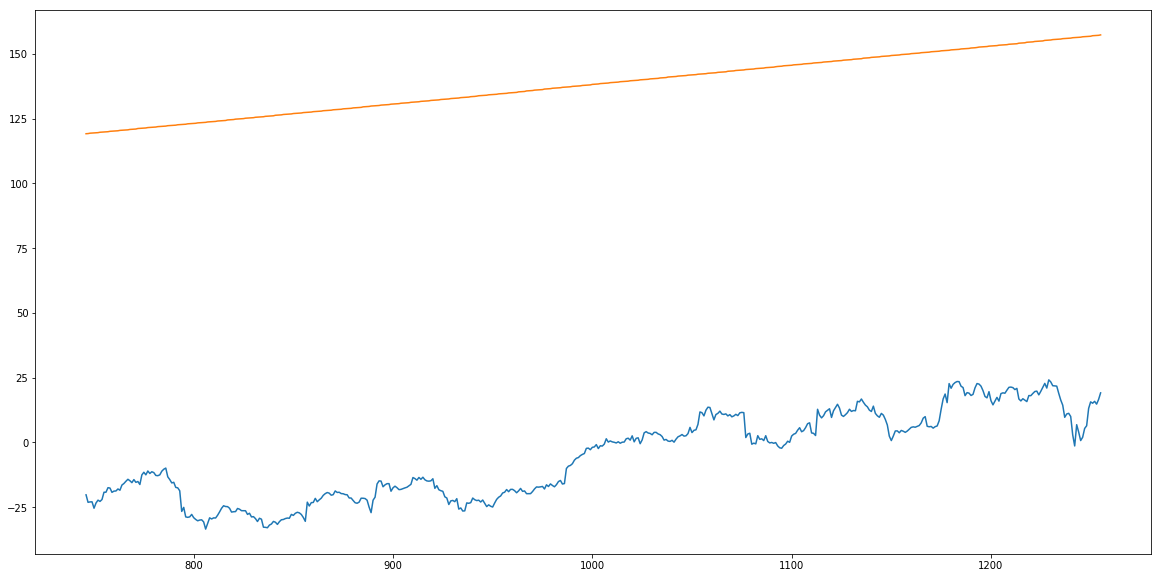

In [26]:
fig, ax = plt.subplots(1, 1)
stock_df.loc[746:1255,'lin_diff'].plot(figsize =(20,10))
stock_df.loc[746:1255,'open_pred'].plot(figsize =(20,10))

In [27]:
stock_reg = LinearRegression()
second_dfs = []
for value in super_chunky.index:
    start = super_chunky.loc[value].start
    end   = super_chunky.loc[value].end
    second_df = pd.DataFrame(data=stock_df.loc[start:end].days.values,columns = ['days'],index = stock_df.loc[start:end].days.values)
    stock_reg.fit(X=stock_df.loc[start:end]['days'].values[:, np.newaxis], y=stock_df.loc[start:end]['Open'].values[:, np.newaxis])
    second_df['pred'] = stock_reg.predict(stock_df.loc[start:end]['days'].values[:, np.newaxis])
    second_df.set_index('days')
    second_dfs.append(second_df)
second_dfs[0].head(3)

,days,pred
29,29,60.928899
30,30,60.943631
31,31,60.958362


In [41]:
super_chunky.sort_values(by='span',ascending =False).head(3)

,span,start,end,start_date,end_date,min_heart,max_heart,chunk_std
3,509,746,1255,2016-02-18,2018-02-26,90.000000,179.369995,0.193097
34,115,601,716,2015-07-22,2016-01-05,94.870003,126.199997,0.193097
0,96,793,889,2016-04-26,2016-09-12,90.000000,109.629997,0.000000


In [30]:
stock_df = stock_df.set_index('days')

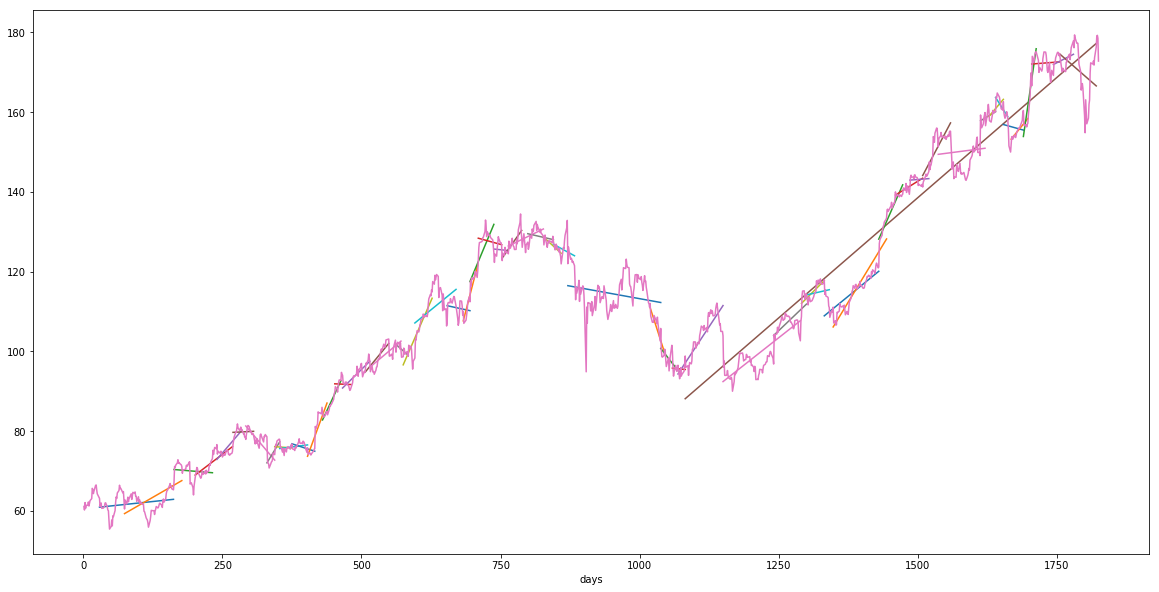

In [31]:
fig, ax = plt.subplots(1, 1)
for df in second_dfs:
    df.loc[:,'pred'].plot(ax=ax,figsize =(20,10))
stock_df.loc[:,'Open'].plot(ax=ax,figsize =(20,10))

In [32]:
len(second_dfs)

56

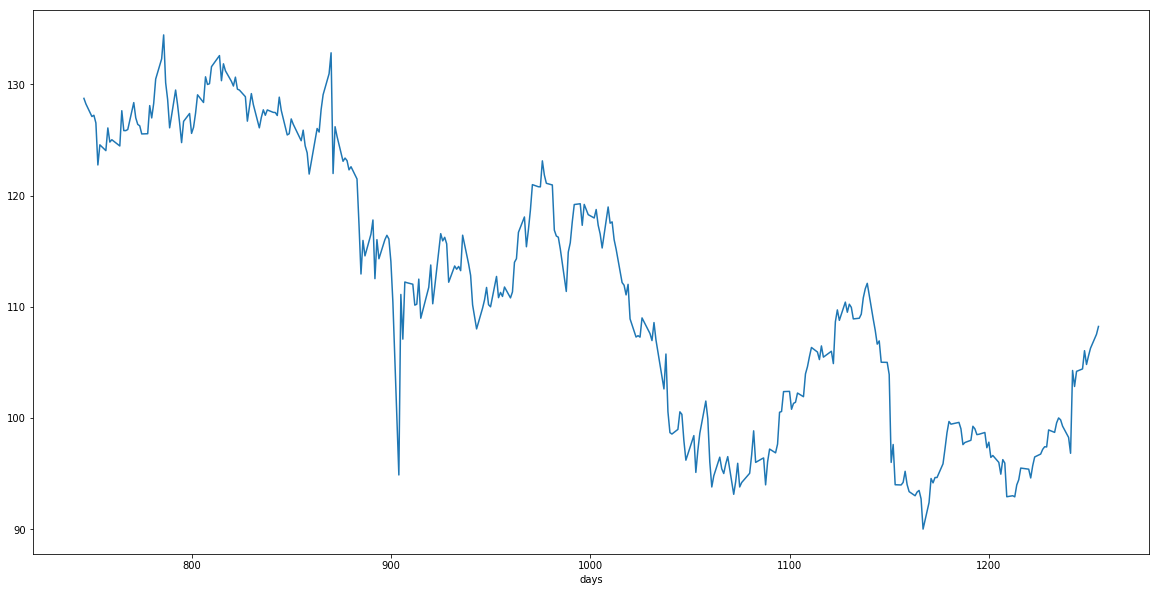

In [33]:
stock_df.loc[746:1255,'Open'].plot(figsize =(20,10))

In [34]:
for value in second_dfs:
    print(value.days.head(1).append(value.days.tail(1)))

29      29
162    162
Name: days, dtype: int64
74      74
177    177
Name: days, dtype: int64
163    163
232    232
Name: days, dtype: int64
201    201
268    268
Name: days, dtype: int64
240    240
285    285
Name: days, dtype: int64
269    269
306    306
Name: days, dtype: int64
292    292
344    344
Name: days, dtype: int64
330    330
353    353
Name: days, dtype: int64
344    344
375    375
Name: days, dtype: int64
353    353
403    403
Name: days, dtype: int64
375    375
416    416
Name: days, dtype: int64
403    403
438    438
Name: days, dtype: int64
430    430
463    463
Name: days, dtype: int64
452    452
481    481
Name: days, dtype: int64
466    466
515    515
Name: days, dtype: int64
507    507
549    549
Name: days, dtype: int64
515    515
571    571
Name: days, dtype: int64
561    561
584    584
Name: days, dtype: int64
575    575
627    627
Name: days, dtype: int64
596    596
670    670
Name: days, dtype: int64
654    654
695    695
Name: days, dtype: int64
683    683
70

In [36]:
stock_df.head(8)

,Date,Open,High,Low,Close,Adj Close,Volume,open_pred,lin_diff,percentile,index,percentile_delta
days,,,,,,,,,,,,
1,2013-03-04,61.114285,61.171429,59.857143,60.007141,45.080402,145688900,63.326615,-2.212330,0.41,1,0.03
2,2013-03-05,60.211430,62.169998,60.107143,61.591427,46.270584,159608400,63.378239,-3.166809,0.38,2,0.06
3,2013-03-06,62.072857,62.178570,60.632858,60.808571,45.682465,115062500,63.429864,-1.357007,0.44,3,0.05
4,2013-03-07,60.642857,61.715714,60.151428,61.511429,46.210499,117118400,63.481488,-2.838631,0.39,4,0.02
5,2013-03-08,61.400002,62.204285,61.230000,61.674286,46.332844,97870500,63.533113,-2.133111,0.41,5,0.01
8,2013-03-11,61.392857,62.715714,60.734287,62.552856,46.992863,118559000,63.687986,-2.295129,0.40,8,0.03
9,2013-03-12,62.228573,62.697144,61.081429,61.204285,45.979744,116477900,63.739611,-1.511038,0.43,9,0.04
10,2013-03-13,61.207142,62.071430,60.765713,61.192856,45.971165,101387300,63.791235,-2.584093,0.39,10,0.03
